Loading Breast Cancer Dataset...
Dataset loaded with 569 samples and 30 features.

Accuracy: 94.74%

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.91      0.93        43
      benign       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[39  4]
 [ 2 69]]

Visualizing the Decision Tree...


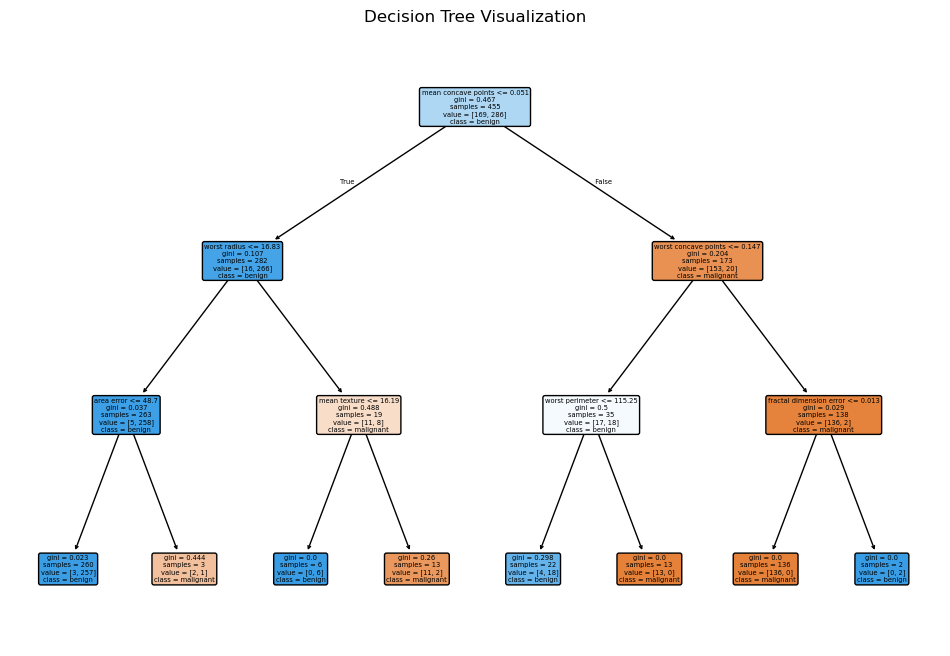


Classifying New Sample (first test sample): [1.247e+01 1.860e+01 8.109e+01 4.819e+02 9.965e-02 1.058e-01 8.005e-02
 3.821e-02 1.925e-01 6.373e-02 3.961e-01 1.044e+00 2.497e+00 3.029e+01
 6.953e-03 1.911e-02 2.701e-02 1.037e-02 1.782e-02 3.586e-03 1.497e+01
 2.464e+01 9.605e+01 6.779e+02 1.426e-01 2.378e-01 2.671e-01 1.015e-01
 3.014e-01 8.750e-02]
Predicted Class: benign
True Class: benign


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Loading Breast Cancer Dataset...")
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names
print(f"Dataset loaded with {X.shape[0]} samples and {X.shape[1]} features.")

# print("\nSplitting dataset into training and testing sets (80/20)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nVisualizing the Decision Tree...")
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

new_sample = X_test[0]
prediction = model.predict([new_sample])[0]
print(f"\nClassifying New Sample (first test sample):", new_sample)
print(f"Predicted Class: {target_names[prediction]}")
print(f"True Class: {target_names[y_test[0]]}")